# COVID-19 Interactive Data Dashboard
<p>

![title](img\covid-19-image.png)

## Background

On December 31, 2019, the World Health Organization (WHO) was informed of an outbreak of “pneumonia of unknown cause” detected in Wuhan City, Hubei Province, China – the seventh-largest city in China with 11 million residents. On March 11 2020, the World Health Organization (WHO) declared it a pandemic, pointing to the over 118,000 cases of the coronavirus illness in over 110 countries and territories around the world at the time.

Coronaviruses are a large group of viruses that can cause illness in animals and humans. Some coronaviruses commonly circulate and usually cause upper respiratory symptoms such as cough or runny nose - although some can cause more serious illness. The 2019 novel (new) coronavirus causes the illness coronavirus disease 2019 (COVID-19).

This dataset (provided by John Hopkins School of Engineering) includes time series data tracking the number of people affected by COVID-19 worldwide, including:

- confirmed tested cases of Coronavirus infection
- the number of people who have reportedly died while sick with Coronavirus
- the number of people who have reportedly recovered from it

In [1]:
# Import libraries

from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
from IPython.core.display import display, HTML

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import folium
import plotly.graph_objects as go
import seaborn as sns
import ipywidgets as widgets

# debug the libraries below - one of them throws an error in Voila


# import os
# import json
# import re

# import pandas as pd
# import numpy as np

# import seaborn as sns
# import matplotlib.pyplot as plt
# %matplotlib inline

# # plotly libraries
# import plotly.express as px
# import plotly.graph_objects as go
# import chart_studio.plotly as py
# #from plotly.offline import init_notebook_mode, iplot
# #init_notebook_mode(connected=True)
# import cufflinks as cf
# #import plotly.plotly as py

# #to get continents
# import pycountry as pc
# from datapackage import package

# # dash components
# import dash
# import dash_table
# from dash.dependencies import Input, Output
# import dash_core_components as dcc
# import dash_html_components as html

# # Dash for jupyter
# import jupyterlab_dash


Instead of downloading each csv locally, we connect to the github raw csv data set (master) for the latest data

In [2]:
# csv from github url

url_1 = 'https://raw.githubusercontent.com/datasets/covid-19/master/data/time-series-19-covid-combined.csv'
url_2 = 'https://raw.githubusercontent.com/datasets/covid-19/master/data/countries-aggregated.csv'
url_3 = 'https://raw.githubusercontent.com/datasets/covid-19/master/data/key-countries-pivoted.csv'
url_4 = 'https://raw.githubusercontent.com/datasets/covid-19/master/data/worldwide-aggregated.csv'

# US specific data sets
url_5 = 'https://raw.githubusercontent.com/datasets/covid-19/master/data/us_confirmed.csv'
url_6 = 'https://raw.githubusercontent.com/datasets/covid-19/master/data/us_deaths.csv'

# reference for each country
url_7 = 'https://raw.githubusercontent.com/datasets/covid-19/master/data/reference.csv'


# reset index because date is original index

time_series = pd.read_csv(url_1, index_col=0,parse_dates=[0]).reset_index()
#print (varname(time_series) + ' data loaded to data frame')
countries = pd.read_csv(url_2, index_col=0,parse_dates=[0]).reset_index()
countries_pv = pd.read_csv(url_3, index_col=0,parse_dates=[0]).reset_index()
ww_agg = pd.read_csv(url_4, index_col=0,parse_dates=[0]).reset_index()
usc = pd.read_csv(url_5, index_col=0,parse_dates=[0]).reset_index()
usd = pd.read_csv(url_6, index_col=0,parse_dates=[0]).reset_index()
ref = pd.read_csv(url_7, index_col=0,parse_dates=[0]).reset_index()

print('The dataset was last updated: '+ str(time_series['Date'].max()))

The dataset was last updated: 2020-05-07 00:00:00


In [3]:
# import 4 main data files
#countries = pd.read_csv(r'C:\Users\vijay\OneDrive\Documents\Projects\Covid\covid-19\data\countries-aggregated.csv')
#countries_pv = pd.read_csv(r'C:\Users\vijay\OneDrive\Documents\Projects\Covid\covid-19\data\key-countries-pivoted.csv')
#time_series = pd.read_csv(r'C:\Users\vijay\OneDrive\Documents\Projects\Covid\covid-19\data\time-series-19-covid-combined.csv')
#ww_agg = pd.read_csv(r'C:\Users\vijay\OneDrive\Documents\Projects\Covid\covid-19\data\worldwide-aggregated.csv')

Convert date columns to datetime

In [3]:
# convert Date object to Datetime
countries['Date'] = pd.to_datetime(countries['Date'])
countries_pv['Date'] = pd.to_datetime(countries_pv['Date'])
time_series['Date'] = pd.to_datetime(time_series['Date'])
ww_agg['Date'] = pd.to_datetime(ww_agg['Date'])
usc['Date'] = pd.to_datetime(usc['Date'])
usd['Date'] = pd.to_datetime(usd['Date'])

Set most recent date as a variable, for easy reference

In [4]:
last_date = time_series['Date'].max()
last_date

Timestamp('2020-05-07 00:00:00')

In [5]:
countries.head()

Date      Country  Confirmed  Recovered  Deaths
0 2020-01-22  Afghanistan          0          0       0
1 2020-01-22      Albania          0          0       0
2 2020-01-22      Algeria          0          0       0
3 2020-01-22      Andorra          0          0       0
4 2020-01-22       Angola          0          0       0

In [6]:
countries_pv.head()

Date  China  US  United_Kingdom  Italy  France  Germany  Spain  Iran
0 2020-01-22    548   1               0      0       0        0      0     0
1 2020-01-23    643   1               0      0       0        0      0     0
2 2020-01-24    920   2               0      0       2        0      0     0
3 2020-01-25   1406   2               0      0       3        0      0     0
4 2020-01-26   2075   5               0      0       3        0      0     0

In [7]:
time_series.head()

Date Country/Region Province/State   Lat  Long  Confirmed  Recovered  \
0 2020-01-22    Afghanistan            NaN  33.0  65.0        0.0        0.0   
1 2020-01-23    Afghanistan            NaN  33.0  65.0        0.0        0.0   
2 2020-01-24    Afghanistan            NaN  33.0  65.0        0.0        0.0   
3 2020-01-25    Afghanistan            NaN  33.0  65.0        0.0        0.0   
4 2020-01-26    Afghanistan            NaN  33.0  65.0        0.0        0.0   

   Deaths  
0     0.0  
1     0.0  
2     0.0  
3     0.0  
4     0.0

In [24]:
ww_agg.head()

Date  Confirmed  Recovered  Deaths  Increase rate
0 2020-01-22        555         28      17            NaN
1 2020-01-23        654         30      18      17.837838
2 2020-01-24        941         36      26      43.883792
3 2020-01-25       1434         39      42      52.391073
4 2020-01-26       2118         52      56      47.698745

In [76]:
ref.head()

UID iso2 iso3  code3  FIPS Admin2 Province_State Country_Region       Lat  \
0    4   AF  AFG    4.0   NaN    NaN            NaN    Afghanistan  33.93911   
1    8   AL  ALB    8.0   NaN    NaN            NaN        Albania  41.15330   
2   12   DZ  DZA   12.0   NaN    NaN            NaN        Algeria  28.03390   
3   20   AD  AND   20.0   NaN    NaN            NaN        Andorra  42.50630   
4   24   AO  AGO   24.0   NaN    NaN            NaN         Angola -11.20270   

       Long_ Combined_Key  Population  
0  67.709953  Afghanistan  38928341.0  
1  20.168300      Albania   2877800.0  
2   1.659600      Algeria  43851043.0  
3   1.521800      Andorra     77265.0  
4  17.873900       Angola  32866268.0

## Data Preprocessing

First fix Canadian recovered data which is not given by province in the original JHU data

In [58]:
# def fix_canada_recovered_data(rows):
#     expected = {
#         'Date': None,
#         'Province/State': None,
#         'Country/Region': None,
#         'Lat': None,
#         'Long': None,
#         'Case': None,
#         'Confirmed': None,
#         'Recovered': None,
#         }
#     for row in rows:
#         if row.get('Country/Region') == 'Canada' and \
#             row.get('Province/State') == 'Recovered' and not \
#             row.get('Recovered'):
#             continue
#         if row.get('Country/Region') == 'Canada' and not row.get('Province/State'):
#             row['Province/State'] = 'Recovery aggregated'
#             row['Lat'] = row.get('Lat', '56.1304')
#             row['Long'] = row.get('Long', '-106.3468')
#         yield {**expected, **row}
        
#fix_canada_recovered_data(time_series)

#time_series['Recovered'] = time_series['Recovered'].apply(fix_canada_recovered_data)

# created a new dataframe with only aggregated recovery data
can_ts_fix = time_series[(time_series['Country/Region']=='Canada') 
            & (time_series['Province/State']=='Recovery aggregated')
          #& (time_series['Date']=='2020-04-17')
           ].sort_values('Date').reset_index(drop=True)

can_ts_fix.tail()

# define a function to update the recovered number for canada



# result = pd.merge(table1, table2, how='left', on=['key1', 'key2'])

Date Country/Region       Province/State      Lat      Long  \
102 2020-05-03         Canada  Recovery aggregated  56.1304 -106.3468   
103 2020-05-04         Canada  Recovery aggregated  56.1304 -106.3468   
104 2020-05-05         Canada  Recovery aggregated  56.1304 -106.3468   
105 2020-05-06         Canada  Recovery aggregated  56.1304 -106.3468   
106 2020-05-07         Canada  Recovery aggregated  56.1304 -106.3468   

     Confirmed  Recovered  Deaths  
102        NaN    24921.0     NaN  
103        NaN    26030.0     NaN  
104        NaN    27006.0     NaN  
105        NaN    28184.0     NaN  
106        NaN    29260.0     NaN

In [7]:
# test function for updating recovered col
def can_fix(rows):
    for row in rows:
        if row.get('Country/Region') == 'Canada' and \
        row.get('Province/State') != 'Recovery aggregated':
            yield 'Recovered'
            
#can_fix(time_series)          
#time_series[time_series['Province/State']=='Recovery aggregated'] 

In [79]:
# A cleaner country df, without province/state

countries_df = time_series.copy()
countries_df.fillna(0, inplace=True)
countries_df['Active'] = countries_df['Confirmed'] - countries_df['Recovered']

countries_df = countries_df.drop(['Province/State'], axis=1)

countries_df = countries_df.groupby(['Date', 'Country/Region'], as_index=False).agg({'Lat': 'mean',
                                                                       'Long': 'mean',
                                                                       'Confirmed': 'sum',
                                                                       'Deaths': 'sum',
                                                                       'Recovered': 'sum',
                                                                       'Active':'sum'
                                                                     })

# update country centroid which are spread due to provinces/colonies
countries_df.loc[countries_df['Country/Region'] == 'US', 'Lat'] = 39.810489
countries_df.loc[countries_df['Country/Region'] == 'US', 'Long'] = -98.555759

countries_df.loc[countries_df['Country/Region'] == 'France', 'Lat'] = 46.2276
countries_df.loc[countries_df['Country/Region'] == 'France', 'Long'] = 2.2137

countries_df.loc[countries_df['Country/Region'] == 'United Kingdom', 'Lat'] = 55.3781
countries_df.loc[countries_df['Country/Region'] == 'United Kingdom', 'Long'] = -3.4360

countries_df.loc[countries_df['Country/Region'] == 'Denmark', 'Lat'] = 56.2639
countries_df.loc[countries_df['Country/Region'] == 'Denmark', 'Long'] = 9.5018

countries_df.loc[countries_df['Country/Region'] == 'Netherlands', 'Lat'] = 52.1326
countries_df.loc[countries_df['Country/Region'] == 'Netherlands', 'Long'] = 5.2913

countries_df.loc[countries_df['Country/Region'] == 'Canada', 'Lat'] = 59.050000
countries_df.loc[countries_df['Country/Region'] == 'Canada', 'Long'] = -112.833333


countries_df['Description'] = countries_df['Country/Region'] + ', ' \
+ ' Confirmed: ' + countries_df['Confirmed'].astype(str) + ',' \
+ ' Deaths: ' + countries_df['Deaths'].astype(str) + ',' \
+ ' Recovered: ' + countries_df['Recovered'].astype(str)

countries_df = countries_df.assign(logCumConf = np.where(countries_df['Confirmed'] > 0, np.log(countries_df['Confirmed']) / np.log(2), 0))
#countries_df[countries_df['Country/Region']=='Canada'].tail()

C:\Users\vijay\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning:

divide by zero encountered in log



Country/Region  Confirmed
0           Afghanistan     3563.0
1               Albania      842.0
2               Algeria     5182.0
3               Andorra      752.0
4                Angola       36.0
..                  ...        ...
182  West Bank and Gaza      375.0
183      Western Sahara        6.0
184               Yemen       25.0
185              Zambia      153.0
186            Zimbabwe       34.0

[187 rows x 2 columns]

Create a new time series dataframe with additional statistics

In [55]:
covid_ts = time_series.copy()

covid_ts['Province/State'] = covid_ts['Province/State'].fillna(covid_ts['Country/Region'])

covid_ts['Active'] = covid_ts['Confirmed'] - covid_ts['Recovered']

# percentage change
covid_ts['Conf_Pct'] = covid_ts['Confirmed'].pct_change(axis=0)
covid_ts['Rec_Pct'] = covid_ts['Recovered'].pct_change()
covid_ts['Death_Pct'] = covid_ts['Deaths'].pct_change()
covid_ts['Active_Pct'] = covid_ts['Active'].pct_change()

#covid_ts.rename(columns = {'Country/Region': 'Country'}, inplace = True)
covid_ts['Description'] = covid_ts['Country/Region'] + ', ' \
+ ' Province/State: ' + covid_ts['Province/State'] + ',' \
+ ' Confirmed: ' + covid_ts['Confirmed'].astype(str) + ',' \
+ ' Deaths: ' + covid_ts['Deaths'].astype(str) + ',' \
+ ' Recovered: ' + covid_ts['Recovered'].astype(str)

covid_ts = covid_ts.dropna(axis=0, subset=['Confirmed'])
#covid_ts = covid_ts.fillna(0)

covid_ts = covid_ts.assign(logCumConf = np.where(covid_ts['Confirmed'] > 0, np.log(covid_ts['Confirmed']) / np.log(2), 0))

covid_ts[covid_ts['Country/Region']=='Canada'].tail()

C:\Users\vijay\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning:

divide by zero encountered in log



Date Country/Region Province/State      Lat   Long  Confirmed  \
5773 2020-05-03         Canada          Yukon  64.2823 -135.0       11.0   
5774 2020-05-04         Canada          Yukon  64.2823 -135.0       11.0   
5775 2020-05-05         Canada          Yukon  64.2823 -135.0       11.0   
5776 2020-05-06         Canada          Yukon  64.2823 -135.0       11.0   
5777 2020-05-07         Canada          Yukon  64.2823 -135.0       11.0   

      Recovered  Deaths  Active  Conf_Pct  Rec_Pct  Death_Pct  Active_Pct  \
5773        NaN     0.0     NaN       0.0      0.0        NaN         0.0   
5774        NaN     0.0     NaN       0.0      0.0        NaN         0.0   
5775        NaN     0.0     NaN       0.0      0.0        NaN         0.0   
5776        NaN     0.0     NaN       0.0      0.0        NaN         0.0   
5777        NaN     0.0     NaN       0.0      0.0        NaN         0.0   

                                            Description  logCumConf  
5773  Canada,  Province/State: Yukon, Confirmed: 11....    3.459432  
5774  Canada,  Province/State: Yukon, Confirmed: 11....    3.459432  
5775  Canada,  Province/State: Yukon, Confirmed: 11....    3.459432  
5776  Canada,  Province/State: Yukon, Confirmed: 11....    3.459432  
5777  Canada,  Province/State: Yukon, Confirmed: 11....    3.459432

In [10]:
covid_ts['Confirmed'].notnull().shape

(23144,)

Now we will look at global cases over time

In [56]:
global_count = covid_ts.groupby('Date')['Confirmed','Deaths','Recovered','Active'].sum().reset_index()

# Melt the data frame into one column
global_melt = global_count.melt(id_vars="Date"
                                ,value_vars=['Recovered','Deaths','Active','Confirmed']
                                ,var_name='Type'
                                ,value_name='Count'
                               )
global_melt

#global_melt.groupby(['Type']).sum().reset_index()

C:\Users\vijay\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



Date       Type      Count
0   2020-01-22  Recovered       28.0
1   2020-01-23  Recovered       30.0
2   2020-01-24  Recovered       36.0
3   2020-01-25  Recovered       39.0
4   2020-01-26  Recovered       52.0
..         ...        ...        ...
423 2020-05-03  Confirmed  3506729.0
424 2020-05-04  Confirmed  3583055.0
425 2020-05-05  Confirmed  3662691.0
426 2020-05-06  Confirmed  3755341.0
427 2020-05-07  Confirmed  3845718.0

[428 rows x 3 columns]

We now create a separate data frame from covid_ts; this one excludes province/state to get the overall figure by country. Description is re-added, lat and long should be disregarded

In [59]:
country_ts0 = covid_ts.groupby(['Date', 'Country/Region']).sum().reset_index().sort_values('Date')

# Fix Canada recovered
country_ts = pd.merge(country_ts0, can_ts_fix, how = 'outer', on = ['Date','Country/Region'],suffixes=('','_x'))
country_ts['Recovered'] = np.where(country_ts['Country/Region']=='Canada',country_ts['Recovered_x'],country_ts['Recovered'])
#Should also replace lat and long
country_ts.drop(['Province/State','Lat_x','Long_x','Confirmed_x','Recovered_x','Deaths_x'], axis=1, inplace=True)
country_ts['Active'] = country_ts['Confirmed'] - country_ts['Recovered']

country_ts['Description'] = country_ts['Country/Region'] + ', ' \
+ ' Confirmed: ' + country_ts['Confirmed'].astype(str) + ',' \
+ ' Deaths: ' + country_ts['Deaths'].astype(str) + ',' \
+ ' Recovered: ' + country_ts['Recovered'].astype(str)

country_ts.tail()

Date Country/Region      Lat     Long  Confirmed  Recovered  \
20004 2020-05-07         Gambia  13.4432 -15.3101       18.0        9.0   
20005 2020-05-07        Georgia  42.3154  43.3569      615.0      275.0   
20006 2020-05-07        Germany  51.0000   9.0000   169430.0   141700.0   
20007 2020-05-07        Estonia  58.5953  25.0136     1720.0      273.0   
20008 2020-05-07       Zimbabwe -20.0000  30.0000       34.0        5.0   

       Deaths   Active  Conf_Pct   Rec_Pct  Death_Pct  Active_Pct  logCumConf  \
20004     1.0      9.0  0.058824  0.000000   0.000000    0.125000    4.169925   
20005     9.0    340.0  0.008197  0.022305   0.000000   -0.002933    9.264443   
20006  7392.0  27730.0  0.007540  0.012866   0.016082   -0.018824   17.370330   
20007    56.0   1447.0  0.004086  0.034091   0.018182   -0.001380   10.748193   
20008     4.0     29.0  0.000000  0.000000   0.000000    0.000000    5.087463   

                                             Description  
20004  Gambia,  Confirmed: 18.0, Deaths: 1.0, Recover...  
20005  Georgia,  Confirmed: 615.0, Deaths: 9.0, Recov...  
20006  Germany,  Confirmed: 169430.0, Deaths: 7392.0,...  
20007  Estonia,  Confirmed: 1720.0, Deaths: 56.0, Rec...  
20008  Zimbabwe,  Confirmed: 34.0, Deaths: 4.0, Recov...

Create a data frame with aggregate cases by country, and top 10 for each category

In [60]:
# Top 10 confirmed cases, deaths, recoveries, recovered

agg_stats = country_ts[country_ts['Date'] == last_date].groupby(['Country/Region'])['Confirmed','Deaths','Recovered','Active'].sum().reset_index()
agg_stats['Recovered'] = agg_stats['Recovered'].fillna(0)


t10c = agg_stats.sort_values('Confirmed', ascending = False).reset_index(drop=True).head(10)
t10d = agg_stats.sort_values('Deaths', ascending = False).reset_index(drop=True).head(10)
t10r = agg_stats.sort_values('Recovered', ascending = False).reset_index(drop=True).head(10)
t10a = agg_stats.sort_values('Active', ascending = False).reset_index(drop=True).head(10)

t10c
agg_stats.tail()

C:\Users\vijay\anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



Country/Region  Confirmed  Deaths  Recovered  Active
182  West Bank and Gaza      375.0     2.0      176.0   199.0
183      Western Sahara        6.0     0.0        5.0     1.0
184               Yemen       25.0     5.0        1.0    24.0
185              Zambia      153.0     4.0      103.0    50.0
186            Zimbabwe       34.0     4.0        5.0    29.0

In [12]:
# Depict Latest Data by country
x = agg_stats.sort_values('Confirmed',ascending=False).head(20).reset_index(drop=True)
x['Confirmed'] = x['Confirmed'].astype(int).apply(lambda x : "{:,}".format(x))
x['Deaths'] = x['Deaths'].astype(int).apply(lambda x : "{:,}".format(x))
x['Recovered'] = x['Recovered'].astype(int).apply(lambda x : "{:,}".format(x))
x['Active'] = x['Active'].astype(int).apply(lambda x : "{:,}".format(x))

# display without index
#HTML(x.to_html(index=False))
x.style.hide_index()

## Investigate Impact of Worldwide Cases

### Cases Over Time

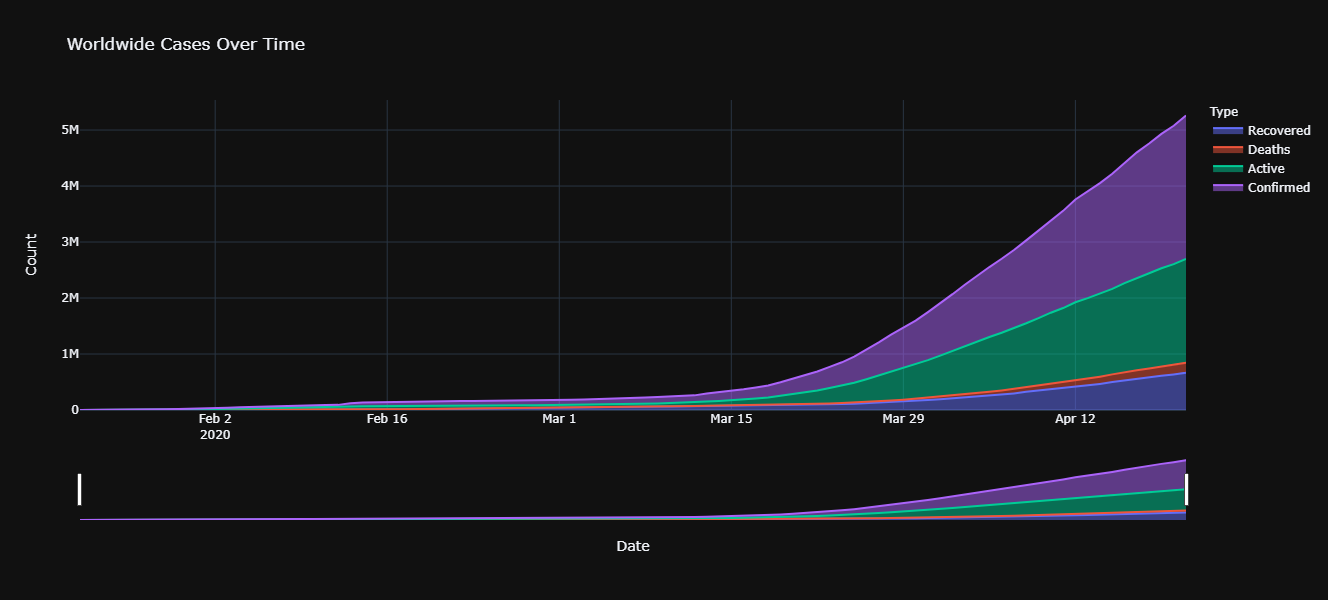

In [16]:
fig = px.area(global_melt
              ,x="Date"
              ,y="Count"
              ,color='Type'
              ,height=600
              ,width=900
              ,title='Worldwide Cases Over Time'
              ,template='plotly_dark'
             )
fig.update_layout(xaxis_rangeslider_visible=True)
fig.show()

Lets look at the top 10 countries by confirmed, deaths and recovered cases

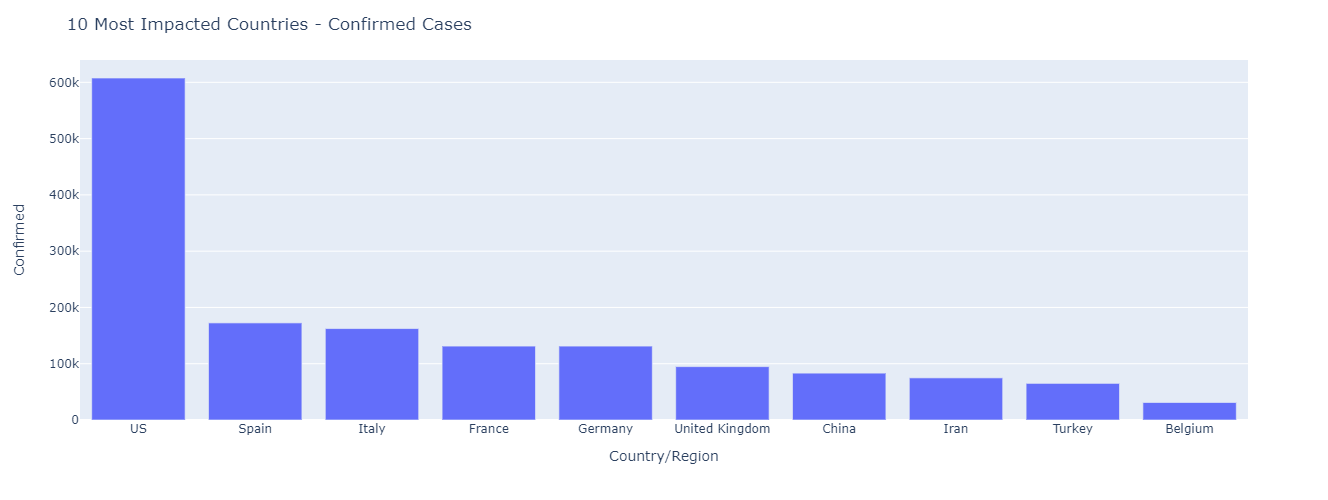

In [10]:
# Plot top 10 confirmed cases by country

fig0 = px.bar(t10c, x = 'Country/Region', y = 'Confirmed'
             ,height=500
            ,width=900)
fig0.update_layout(title="10 Most Impacted Countries - Confirmed Cases")
fig0.show()

Now, lets visualize this data by creating a grouped bar chart by top 10 countries with confirmed cases

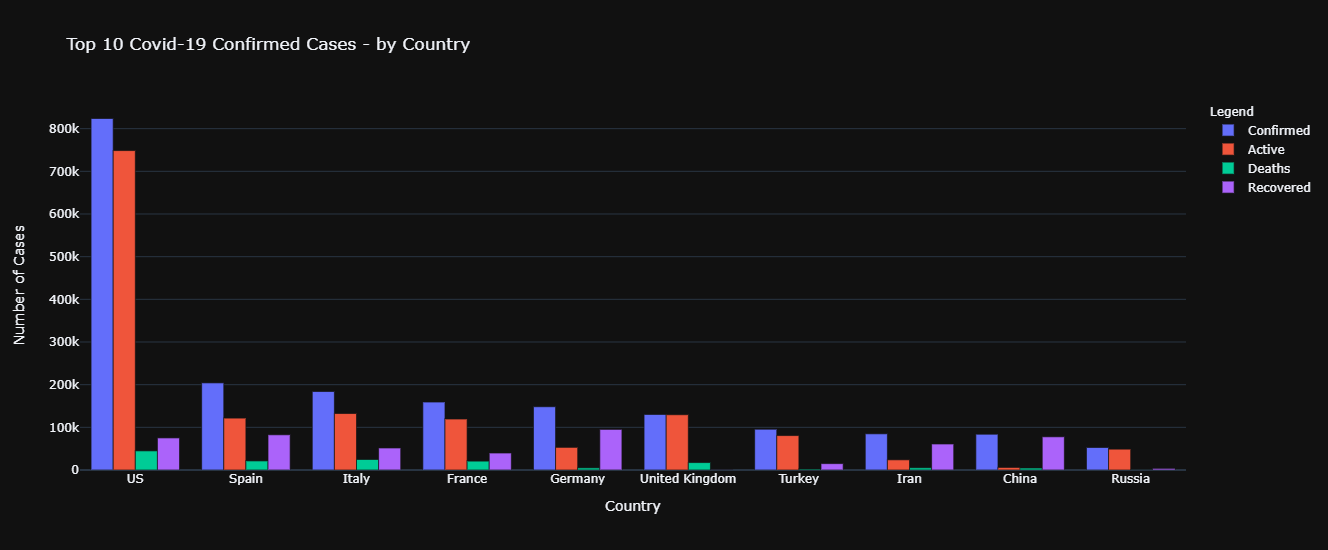

In [15]:
# Create plotly grouped bar chart

fig1 = go.Figure(data=[
    go.Bar(name='Confirmed', x=t10c['Country/Region'], y=t10c['Confirmed'])
    ,go.Bar(name='Active', x=t10c['Country/Region'], y=t10c['Active'])
    ,go.Bar(name='Deaths', x=t10c['Country/Region'], y=t10c['Deaths'])
    ,go.Bar(name='Recovered', x=t10c['Country/Region'], y=t10c['Recovered'])  
])

# Change the bar mode
fig1.update_layout(barmode='group'
                  ,showlegend=True
                  ,title = 'Top 10 Covid-19 Confirmed Cases - by Country'
                  ,legend_title='Legend'
                  ,xaxis_title = 'Country'
                  ,yaxis_title = 'Number of Cases'
                  ,height=550
                  ,width=900
                  ,template='plotly_dark'
                 )
fig1.show()

### Mapping the Global Spread of Cases

In [1]:
# %%time

# df = px.data.gapminder()
# fig2 = px.scatter_geo(covid_ts,
#                      #lat="Lat"
#                      #lon="Long" # for some reason this throws an error
#                      locations = "Country/Region",
#                      locationmode = "country names",
#                      color = "Country/Region",
#                      #mode="markers",
#                      hover_name = "Description", 
#                      #size = "Confirmed",
#                      size = "logCumConf",
#                      animation_frame = covid_ts["Date"].astype(str), #max(covid_ts['Date'])
#                      projection = "natural earth",
#                      template = "plotly_dark",
#                      title = "Covid-19 Confirmed Cases over Time")
# fig2.update_geos(fitbounds = "locations") # adjust map to best fit data points
# fig2.show()

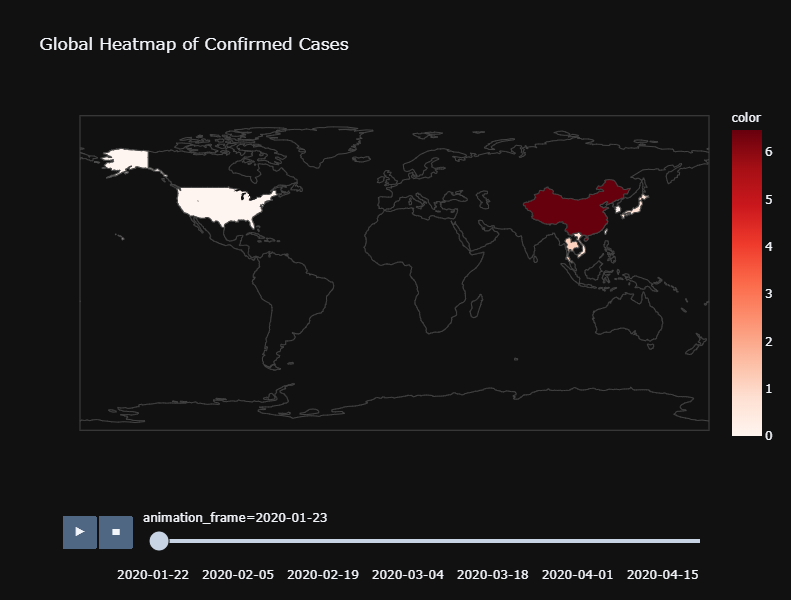

In [23]:
fig = px.choropleth(country_ts
                    ,locations="Country/Region"
                    ,locationmode='country names'
                    ,color=np.log(country_ts["Confirmed"])#np.log(covid_ts["Confirmed"]) #logarithmic scale
                    ,hover_name='Description'
                    ,animation_frame=country_ts["Date"].dt.strftime('%Y-%m-%d')
                    ,title='Global Heatmap of Confirmed Cases'
                    ,color_continuous_scale=px.colors.sequential.Reds #Magenta
                    ,height=600
                    ,width=900
                    ,template='plotly_dark'
                   )
#fig.update_geos(fitbounds = "locations")
fig.update(layout_coloraxis_showscale=True)
fig.show()

### Time Series of Global Cases

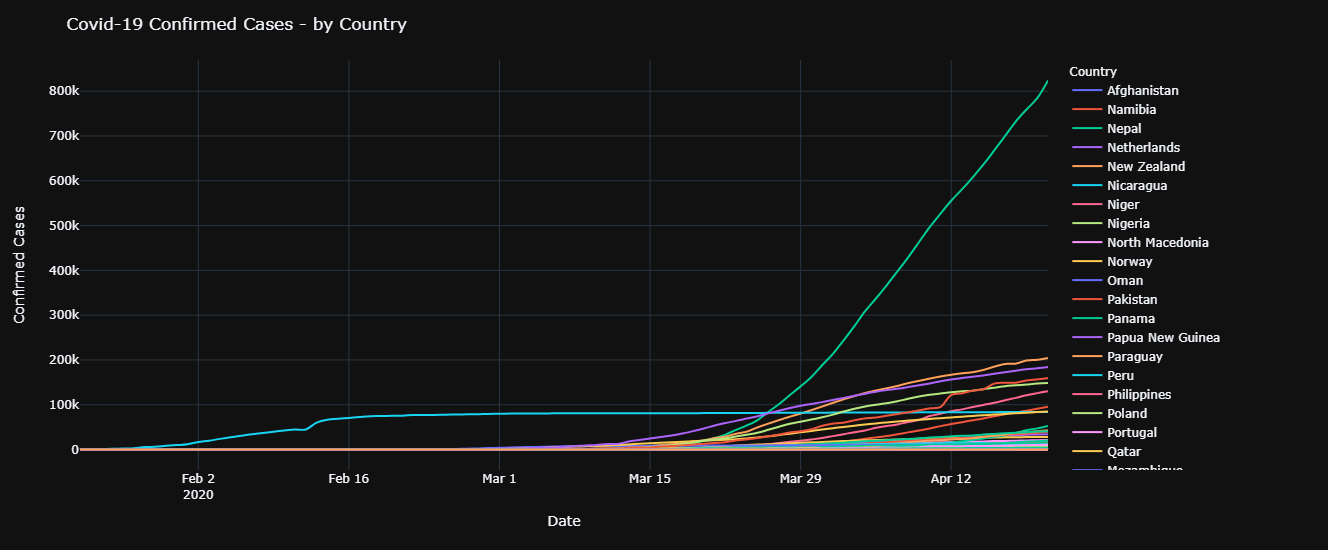

In [24]:
fig3 = px.line(x=country_ts['Date'], 
        y=country_ts["Confirmed"], 
        color=country_ts["Country/Region"], 
        hover_name=country_ts["Country/Region"],
        line_shape="spline", 
        render_mode="svg", 
        template='plotly_dark'
        ,height=550
        ,width=900
)

# Add labels
fig3.update_layout(
    title = "Covid-19 Confirmed Cases - by Country",
    xaxis_title = "Date",
    yaxis_title = "Confirmed Cases",
    legend_title = "Country"
)

fig3.show()

## Cases in Canada

Let's now explore Canada in more depth, as of 2020-04-12, it is not in the top 10 Confirmed

In [64]:
can = covid_ts[covid_ts['Country/Region'] == 'Canada'].groupby('Province/State')#.reset_index(drop=True)
can2 = covid_ts[covid_ts['Country/Region'] == 'Canada'].reset_index()
can2.tail()

index       Date Country/Region Province/State      Lat   Long  \
1227   4747 2020-04-14         Canada          Yukon  64.2823 -135.0   
1228   4748 2020-04-15         Canada          Yukon  64.2823 -135.0   
1229   4749 2020-04-16         Canada          Yukon  64.2823 -135.0   
1230   4750 2020-04-17         Canada          Yukon  64.2823 -135.0   
1231   4751 2020-04-18         Canada          Yukon  64.2823 -135.0   

      Confirmed  Recovered  Deaths  Active  Conf_Pct  Rec_Pct  Death_Pct  \
1227        8.0        NaN     0.0     NaN     0.000      0.0        NaN   
1228        8.0        NaN     0.0     NaN     0.000      0.0        NaN   
1229        8.0        NaN     0.0     NaN     0.000      0.0        NaN   
1230        8.0        NaN     0.0     NaN     0.000      0.0        NaN   
1231        9.0        NaN     0.0     NaN     0.125      0.0        NaN   

      Active_Pct                                        Description  \
1227         0.0  Canada,  Province/State: Yukon, Confirmed: 8.0...   
1228         0.0  Canada,  Province/State: Yukon, Confirmed: 8.0...   
1229         0.0  Canada,  Province/State: Yukon, Confirmed: 8.0...   
1230         0.0  Canada,  Province/State: Yukon, Confirmed: 8.0...   
1231         0.0  Canada,  Province/State: Yukon, Confirmed: 9.0...   

      logCumConf  
1227    3.000000  
1228    3.000000  
1229    3.000000  
1230    3.000000  
1231    3.169925

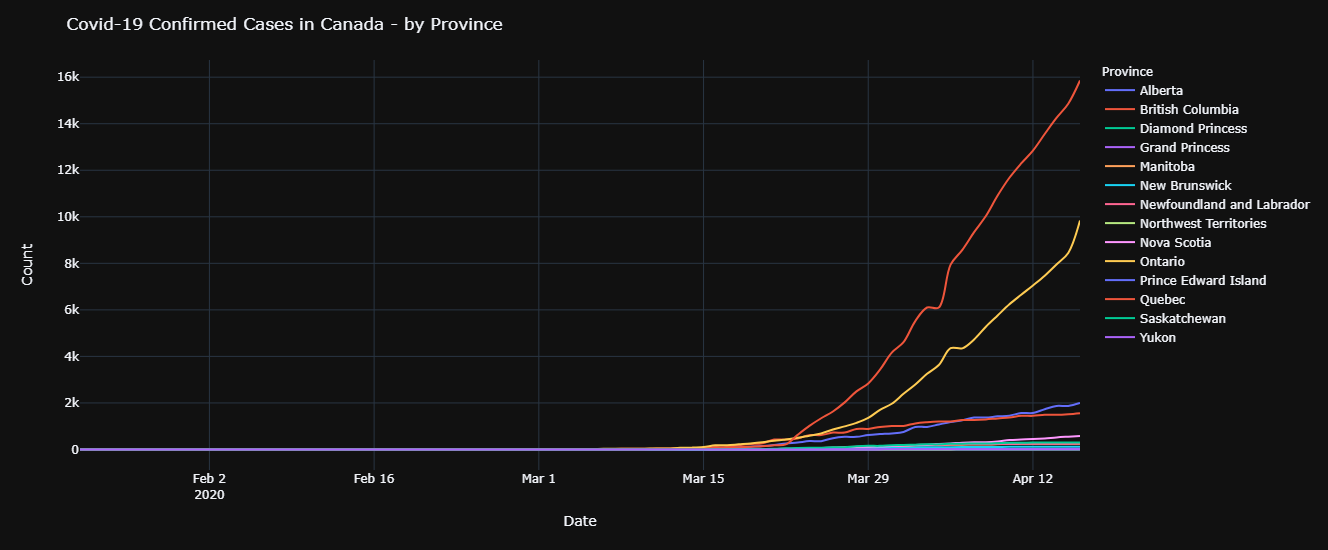

In [15]:
# By province
can = px.line(x=can2['Date'], 
        y=can2["Confirmed"], 
        color=can2['Province/State'], 
        hover_name=can2['Province/State'],
        line_shape="spline", 
        render_mode="svg", 
        template='plotly_dark'
        ,height=550
        ,width=900
)

# Add labels
can.update_layout(
    title = "Covid-19 Confirmed Cases in Canada - by Province",
    xaxis_title = "Date",
    yaxis_title = "Count",
    legend_title = "Province"
)

can.show()

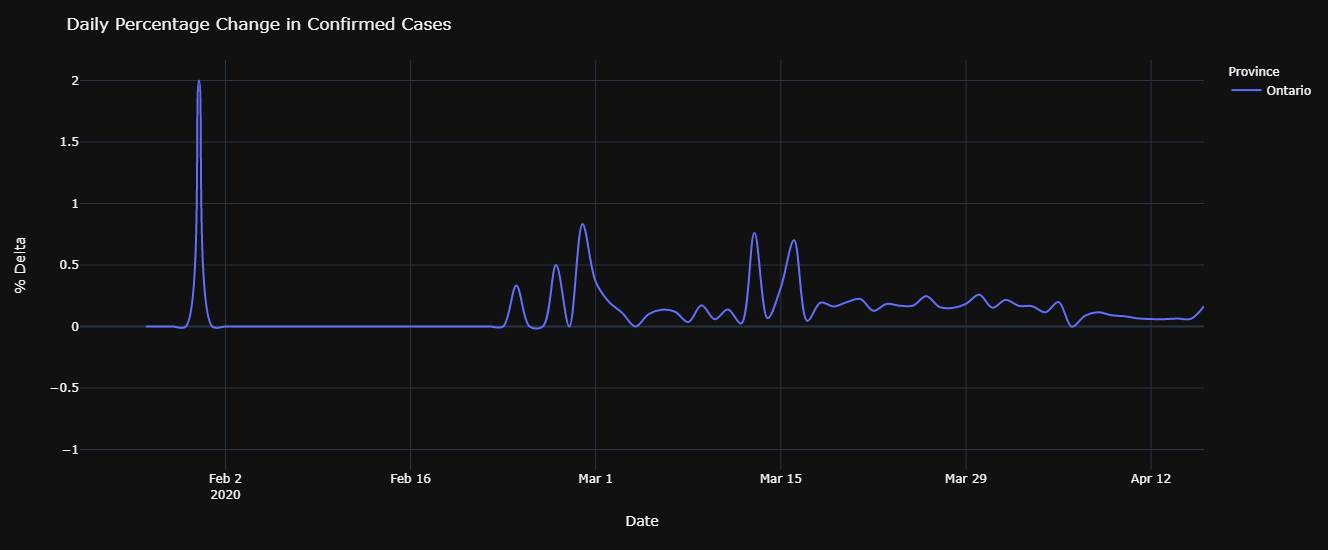

In [25]:
# Percent change increase

ont = can2[can2['Province/State']=='Ontario'].groupby('Date').head()
#should we re-do the percentage change formula?

can = px.line(x=ont['Date'], 
        y=ont["Conf_Pct"], 
        color=ont['Province/State'], 
        hover_name=ont['Province/State'],
        line_shape="spline", 
        render_mode="svg", 
        template='plotly_dark'
        ,height=550
        ,width=900
)

# Add labels
can.update_layout(
    title = "Daily Percentage Change in Confirmed Cases",
    xaxis_title = "Date",
    yaxis_title = "% Delta",
    legend_title = "Province"
)

can.show()


In [45]:
ont = can2[can2['Province/State']=='Ontario'].groupby('Date').head()
ont
#agg_stats = covid_ts[covid_ts['Date'] == last_date].groupby(['Country/Region'])

index       Date Country/Region Province/State      Lat     Long  \
774   4128 2020-01-22         Canada        Ontario  51.2538 -85.3232   
775   4129 2020-01-23         Canada        Ontario  51.2538 -85.3232   
776   4130 2020-01-24         Canada        Ontario  51.2538 -85.3232   
777   4131 2020-01-25         Canada        Ontario  51.2538 -85.3232   
778   4132 2020-01-26         Canada        Ontario  51.2538 -85.3232   
..     ...        ...            ...            ...      ...      ...   
855   4209 2020-04-12         Canada        Ontario  51.2538 -85.3232   
856   4210 2020-04-13         Canada        Ontario  51.2538 -85.3232   
857   4211 2020-04-14         Canada        Ontario  51.2538 -85.3232   
858   4212 2020-04-15         Canada        Ontario  51.2538 -85.3232   
859   4213 2020-04-16         Canada        Ontario  51.2538 -85.3232   

     Confirmed  Recovered  Deaths  Active  Conf_Pct  Rec_Pct  Death_Pct  \
774        0.0        NaN     0.0     NaN -1.000000      0.0  -1.000000   
775        0.0        NaN     0.0     NaN       NaN      0.0        NaN   
776        0.0        NaN     0.0     NaN       NaN      0.0        NaN   
777        0.0        NaN     0.0     NaN       NaN      0.0        NaN   
778        1.0        NaN     0.0     NaN       inf      0.0        NaN   
..         ...        ...     ...     ...       ...      ...        ...   
855     7049.0        NaN   274.0     NaN  0.060319      0.0   0.083004   
856     7470.0        NaN   291.0     NaN  0.059725      0.0   0.062044   
857     7953.0        NaN   334.0     NaN  0.064659      0.0   0.147766   
858     8447.0        NaN   385.0     NaN  0.062115      0.0   0.152695   
859     9840.0        NaN   490.0     NaN  0.164911      0.0   0.272727   

     Active_Pct                                        Description  logCumConf  
774         0.0  Canada,  Province/State: Ontario, Confirmed: 0...    0.000000  
775         0.0  Canada,  Province/State: Ontario, Confirmed: 0...    0.000000  
776         0.0  Canada,  Province/State: Ontario, Confirmed: 0...    0.000000  
777         0.0  Canada,  Province/State: Ontario, Confirmed: 0...    0.000000  
778         0.0  Canada,  Province/State: Ontario, Confirmed: 1...    0.000000  
..          ...                                                ...         ...  
855         0.0  Canada,  Province/State: Ontario, Confirmed: 7...   12.783203  
856         0.0  Canada,  Province/State: Ontario, Confirmed: 7...   12.866893  
857         0.0  Canada,  Province/State: Ontario, Confirmed: 7...   12.957283  
858         0.0  Canada,  Province/State: Ontario, Confirmed: 8...   13.044223  
859         0.0  Canada,  Province/State: Ontario, Confirmed: 9...   13.264443  

[86 rows x 16 columns]

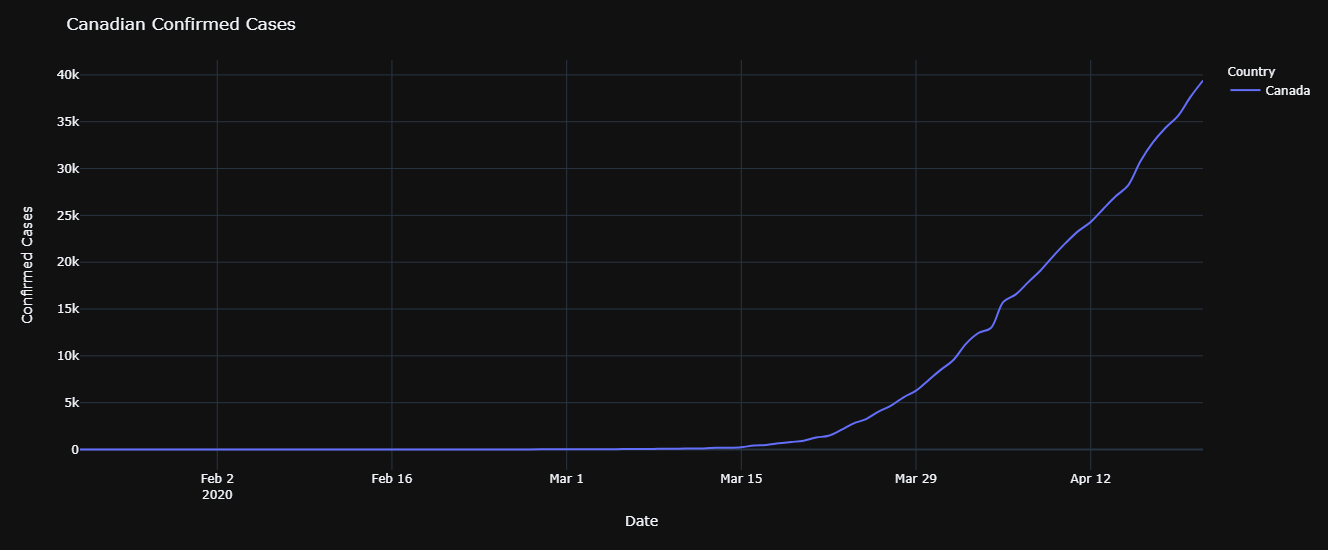

In [50]:
#country_ts[country_ts['Country/Region']=='Canada']

fig=px.line(x=country_ts[country_ts['Country/Region']=='Canada']['Date'], 
        y=country_ts[country_ts['Country/Region']=='Canada']["Confirmed"], 
        color=country_ts[country_ts['Country/Region']=='Canada']["Country/Region"], 
        hover_name=country_ts[country_ts['Country/Region']=='Canada']["Country/Region"],
        line_shape="spline", 
        render_mode="svg"
        ,template='plotly_dark'
        ,height=550
        ,width=900
    )

# Add labels
fig.update_layout(
    title = "Canadian Confirmed Cases",
    xaxis_title = "Date",
    yaxis_title = "Confirmed Cases",
    legend_title = "Country"
)


fig.show()

In [43]:
# Dash option for dashboard
# #viewer = jupyterlab_dash.AppViewer()

# app = dash.Dash()
# app.layout = html.Div('Test 3 Dash Plot')
# if __name__ == '__main__':
#     app.run_server(debug=True)
    
# #viewer.show(app)  


Reference links:

- Novel Coronavirus 2019 time series data on cases https://datahub.io/core/covid-19
- Kaggle data analysis https://www.kaggle.com/imdevskp/covid-19-analysis-visualization-comparisons/notebook#Dataset
- Kaggle Dashboard https://covid19-dash.herokuapp.com/
- Github data source https://github.com/datasets/covid-19
- John Hopkins Covid-19 Website https://systems.jhu.edu/research/public-health/ncov/
- Using the data responsibly https://medium.com/nightingale/ten-considerations-before-you-create-another-chart-about-covid-19-27d3bd691be8
- Canada specific plots https://www.macleans.ca/society/health/coronavirus-in-canada-these-charts-show-how-our-fight-to-flatten-the-curve-is-going/
- How fast does a virus spread? https://www.wired.com/story/how-fast-does-a-virus-spread/
- JHU Journal Article https://systems.jhu.edu/research/public-health/ncov-model-2/